<a href="https://colab.research.google.com/github/RogerioSeixas/Estudo-de-caso-Materias-Primas/blob/main/Estudo_de_caso_Mat%C3%A9rias_primas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Neste estudo de caso, usaremos uma base de dados de máterias-primas e sua evolução comercial ao longo dos anos. A base tem como parâmetro o mês de Maio de 1994, até Maio de 2016.
df=pd.read_csv ('/agricultural_raw_material.csv')

In [ ]:
# Verificação de dados ausentes no BD
df.info
df.isnull().sum()

,0
Month,0
Coarse wool Price,34
Coarse wool price % Change,34
Copra Price,22
Copra price % Change,22
Cotton Price,0
Cotton price % Change,0
Fine wool Price,34
Fine wool price % Change,34
Hard log Price,0


In [ ]:
# Tratamento da base de dados

#Transcrevendo poossíveis erros ou informações pendentes em nulo (Null)
df = df.replace ('%','', regex=True)
df = df.replace (',','', regex=True)
df = df.replace ('-','', regex=True)
df = df.replace ('', np.nan)
df = df.replace ('May90', np.nan)

# Removendo valores nulos
df = df.dropna()

#Conferindo se o tratamento foi realizado corretamente
df.info
df.isnull().sum()

#Convertendo o tipo de dado para float

#Exibindo as colunas dentro do data set
df.columns

#Criando uma lista e convertendo o tipo de dado para float
lst = ['Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change']
df[lst] = df[lst].astype(float)
df.dtypes


,0
Month,object
Coarse wool Price,float64
Coarse wool price % Change,float64
Copra Price,float64
Copra price % Change,float64
Cotton Price,float64
Cotton price % Change,float64
Fine wool Price,float64
Fine wool price % Change,float64
Hard log Price,float64


In [ ]:
#Formatando as informações de data
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Month')

In [ ]:
#Conferindo a formatação de datas da base de dados
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
1990-10-01,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,2.39,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51


In [ ]:
#Importação das bibliotecas Seaborn e Matplotlib

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style ('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

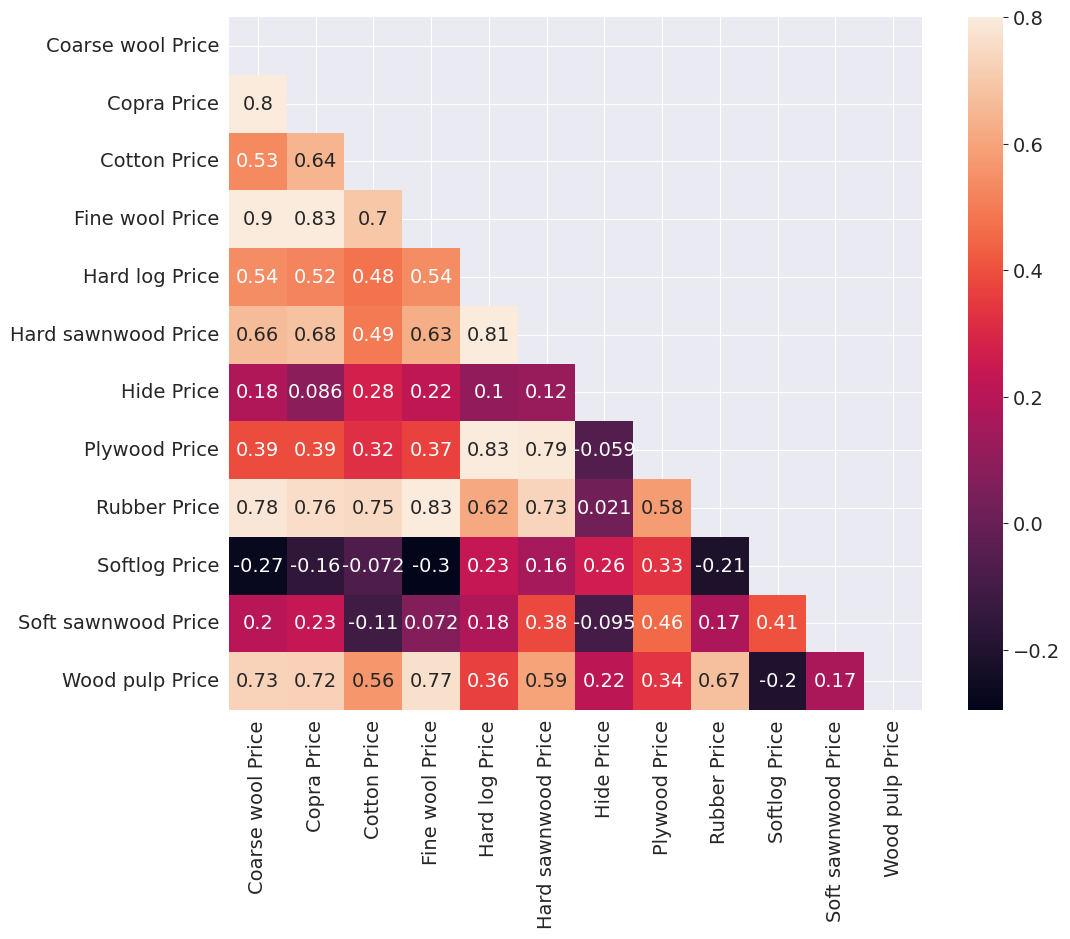

In [ ]:
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price','Hard log Price', 'Hard sawnwood Price',
            'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price',  'Wood pulp Price']
corrmat = df[raw_data].corr()
fig = plt.figure(figsize=(12,9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, annot=True)
plt.show()


  O mapa de calor acima, evidência a correlação entre as matérias-primas, onde quanto maior for o valor correlacionado, maior será a chance de serem matérias-primas relacionadas.


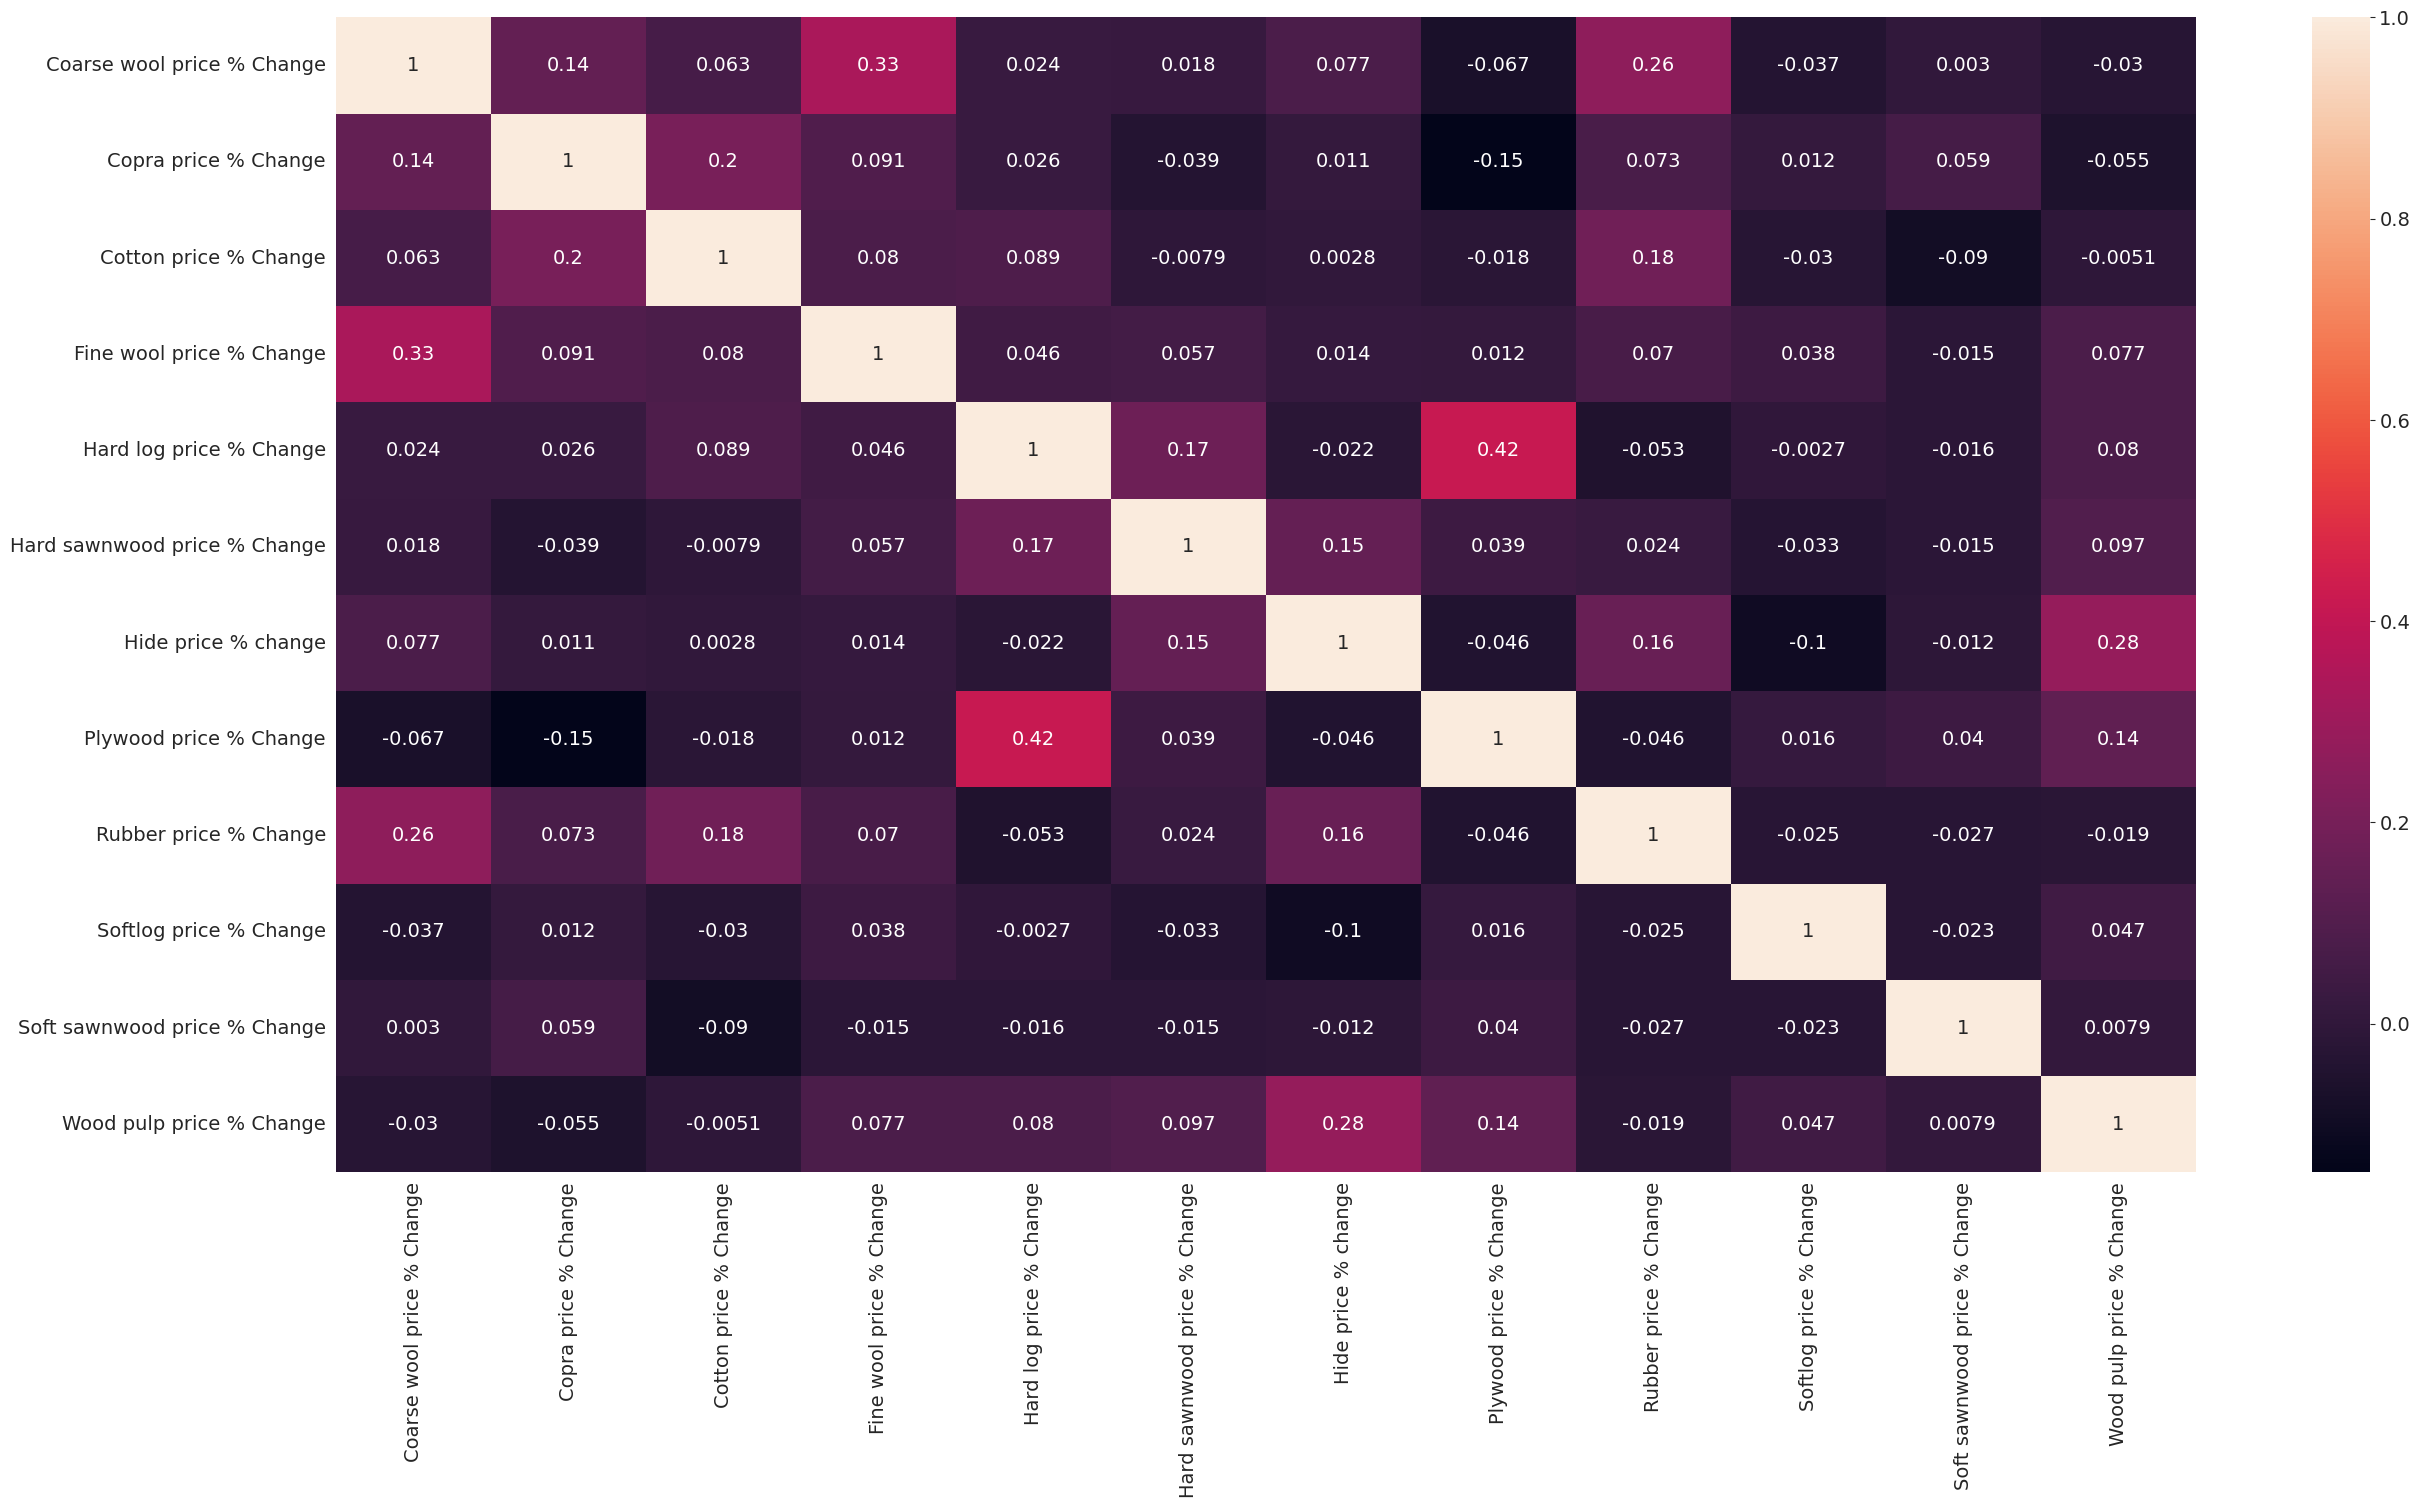

In [ ]:
plt.figure(figsize=(30,15))
changelist=['Coarse wool price % Change',  'Copra price % Change',  'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',  'Rubber price % Change', 'Softlog price % Change',  'Soft sawnwood price % Change', 'Wood pulp price % Change']
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

  A partir do segundo gráfico apresentado, podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas.
   * O valor negativo, implica que duas variavéis estão negativamente correlacionadas (quando há o aumento em um, há o drecréscimo em outra)
   *   Zero implica que não há correlação

Tendo em vista estas informações, é possível afirmar que não há uma correlação percentual negativa em relação as matérias primas.






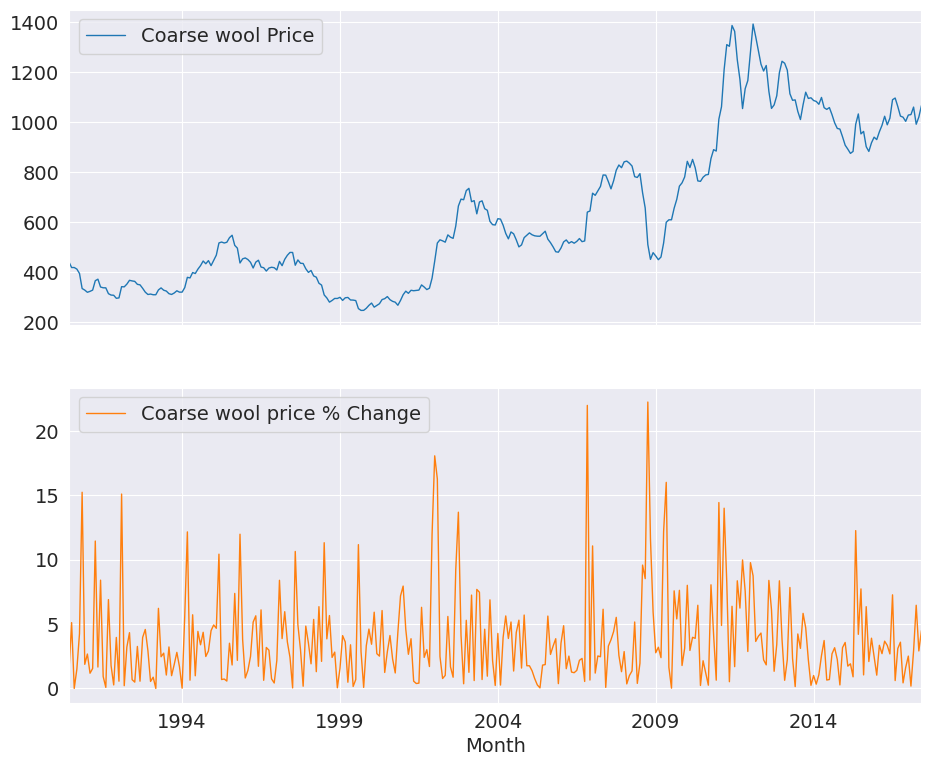

In [ ]:
axes=df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(11,9), subplots=True, linewidth=1)

  Neste exemplo, podemos vizualizar o valor evolutivo da matéria-prima, e seu percentual de aumento ao longo dos anos. Utilizamos como objeto de estudo, a lã grossa.

  E como poderíamos vizualiar a variação normal dos preços de cada matéria-prima ao longo dos anos?
  Abaixo está

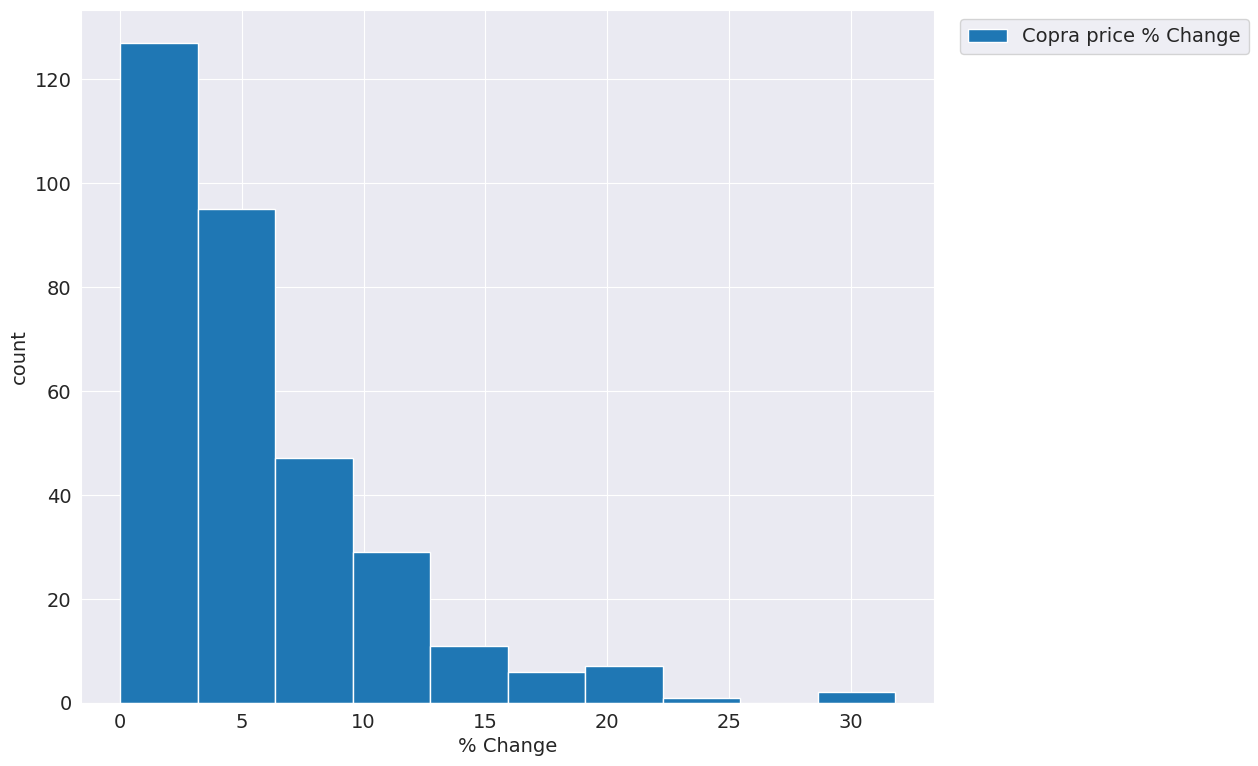

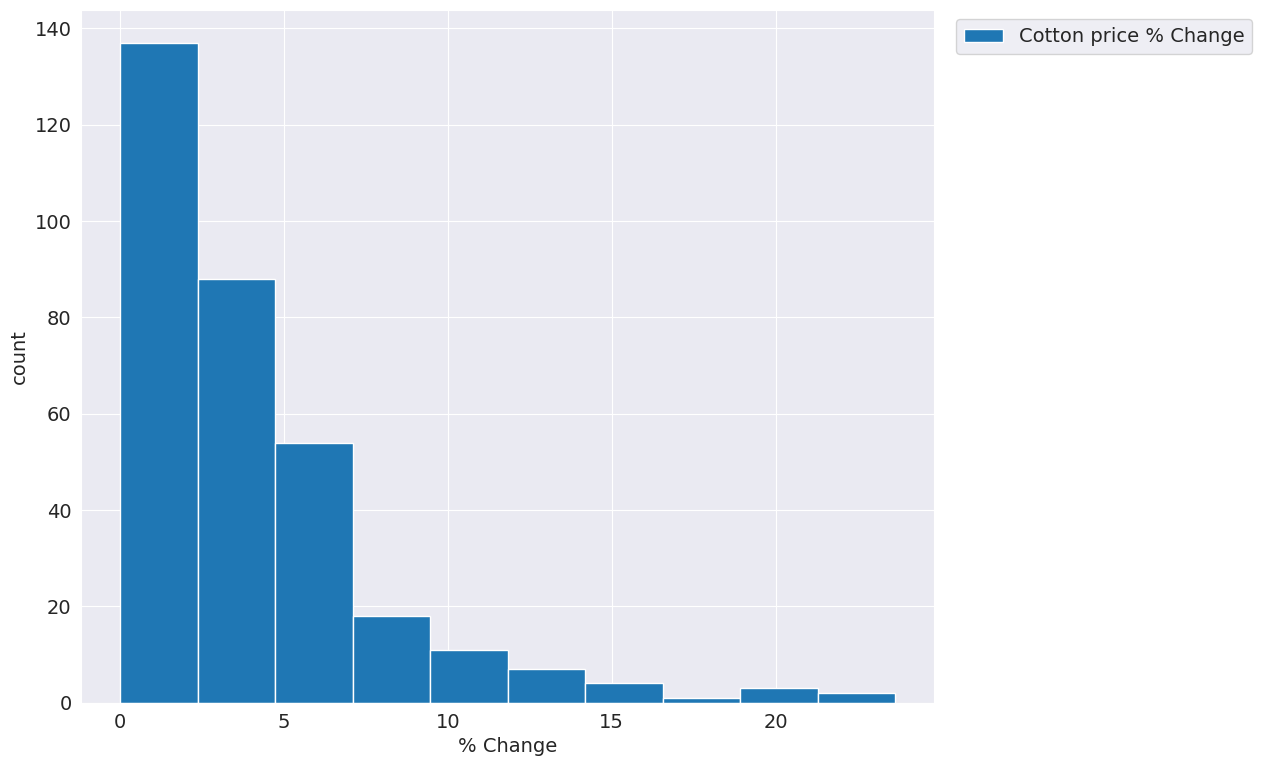

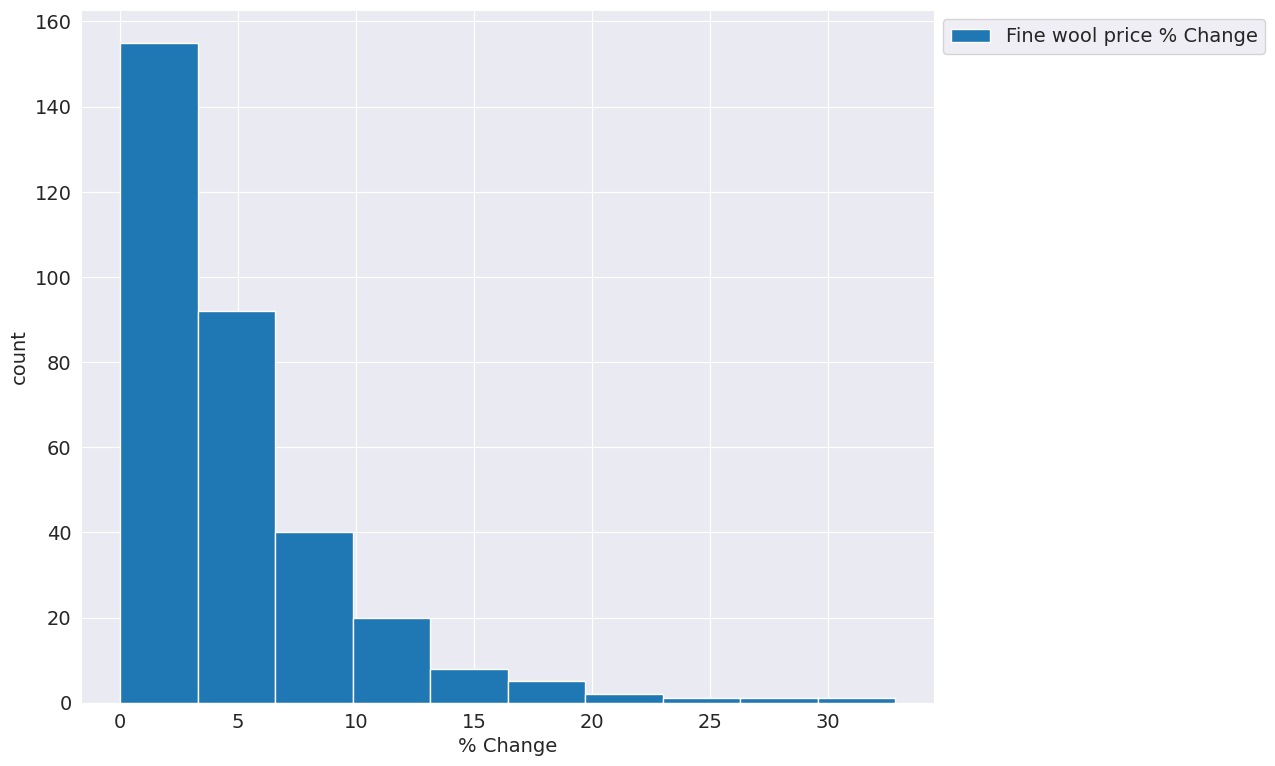

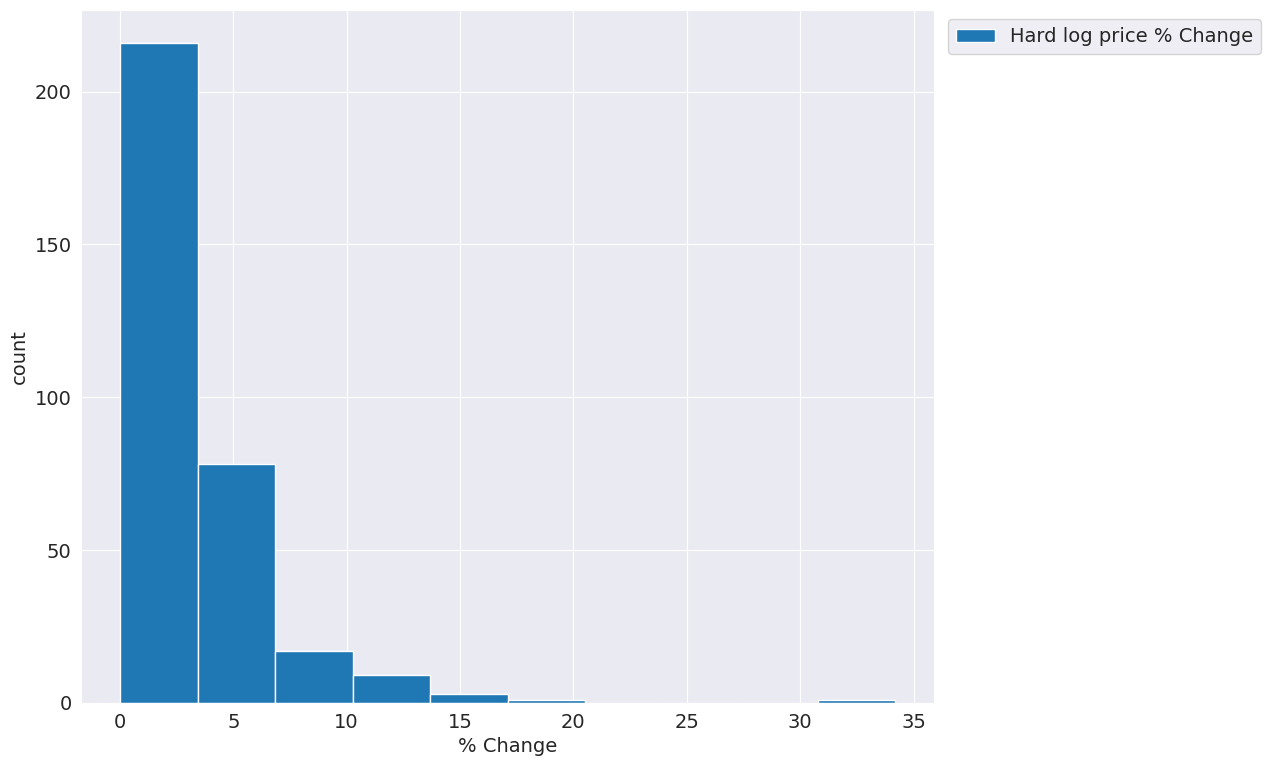

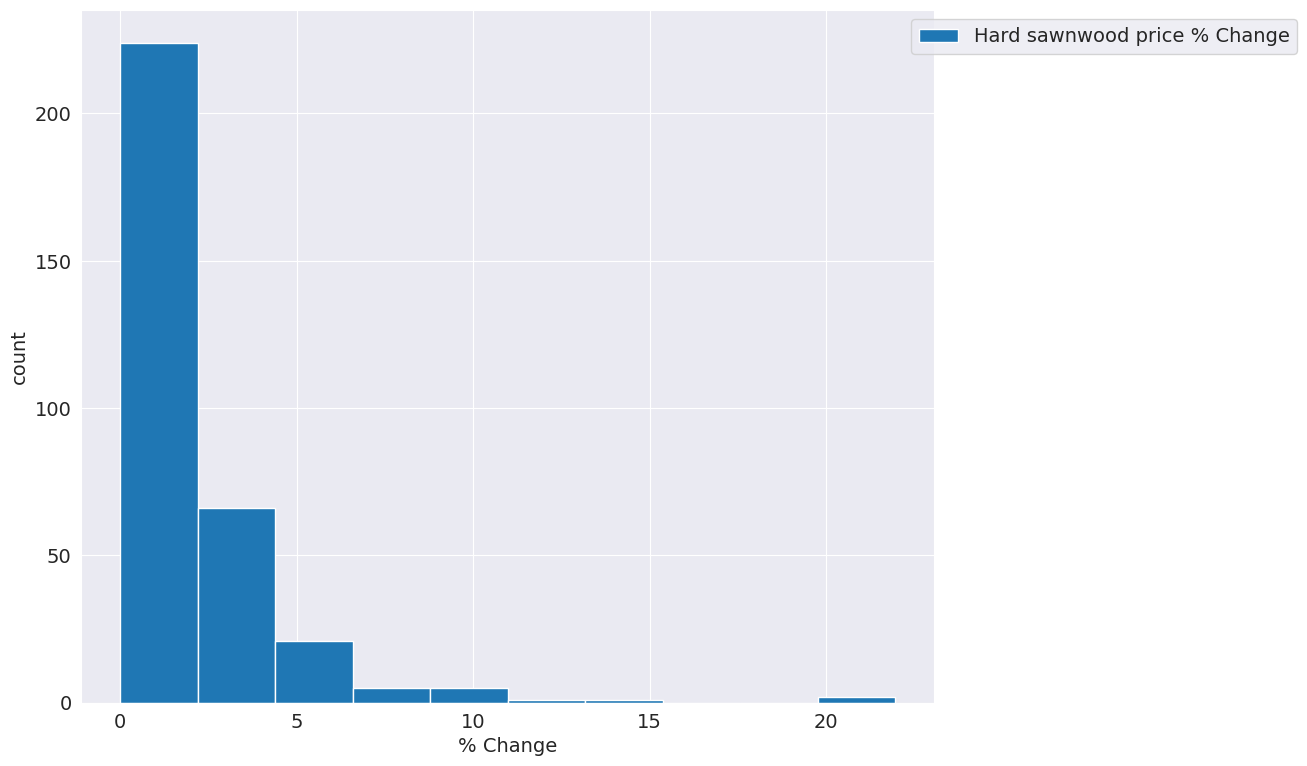

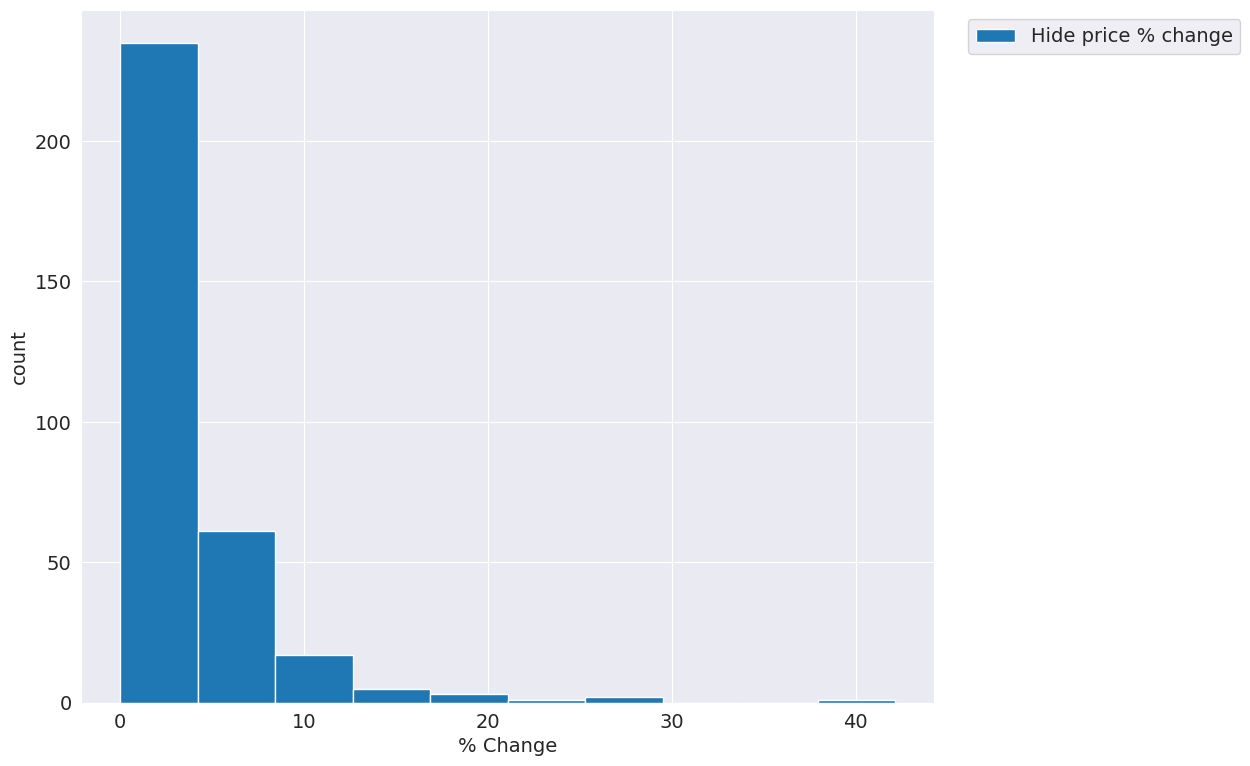

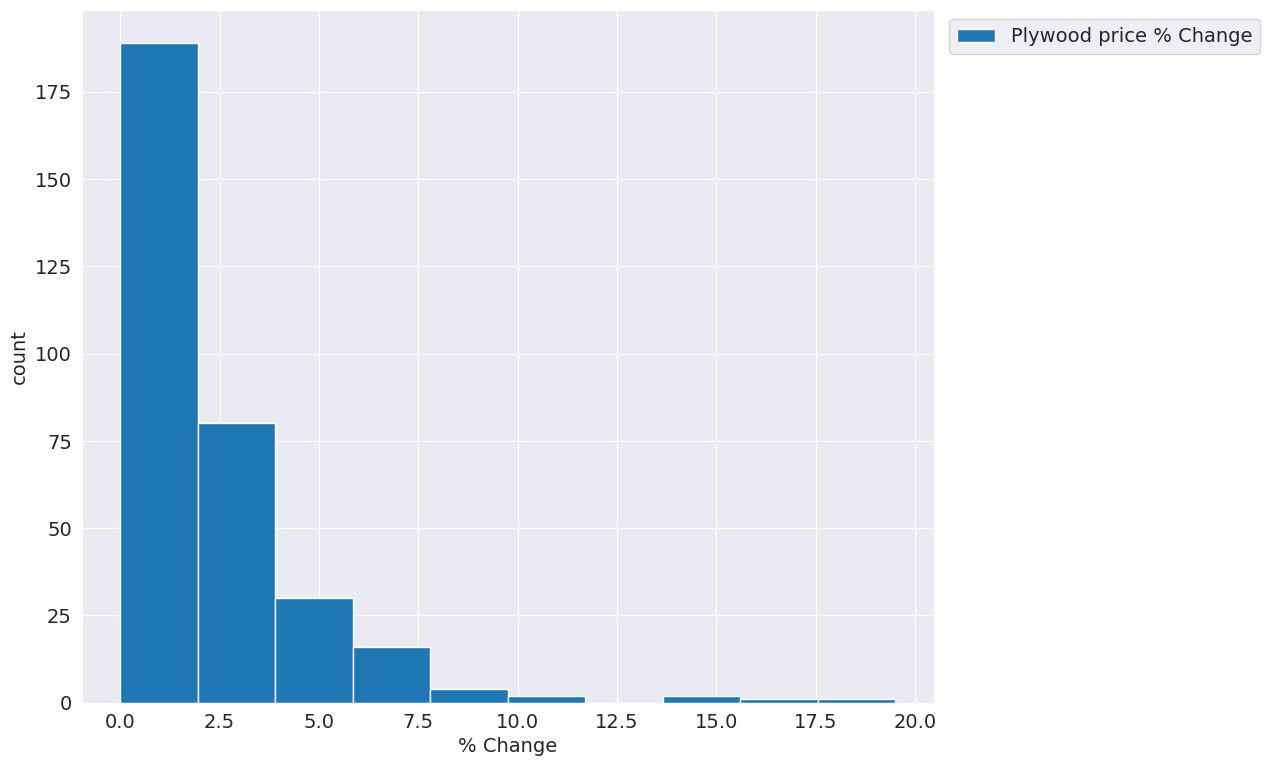

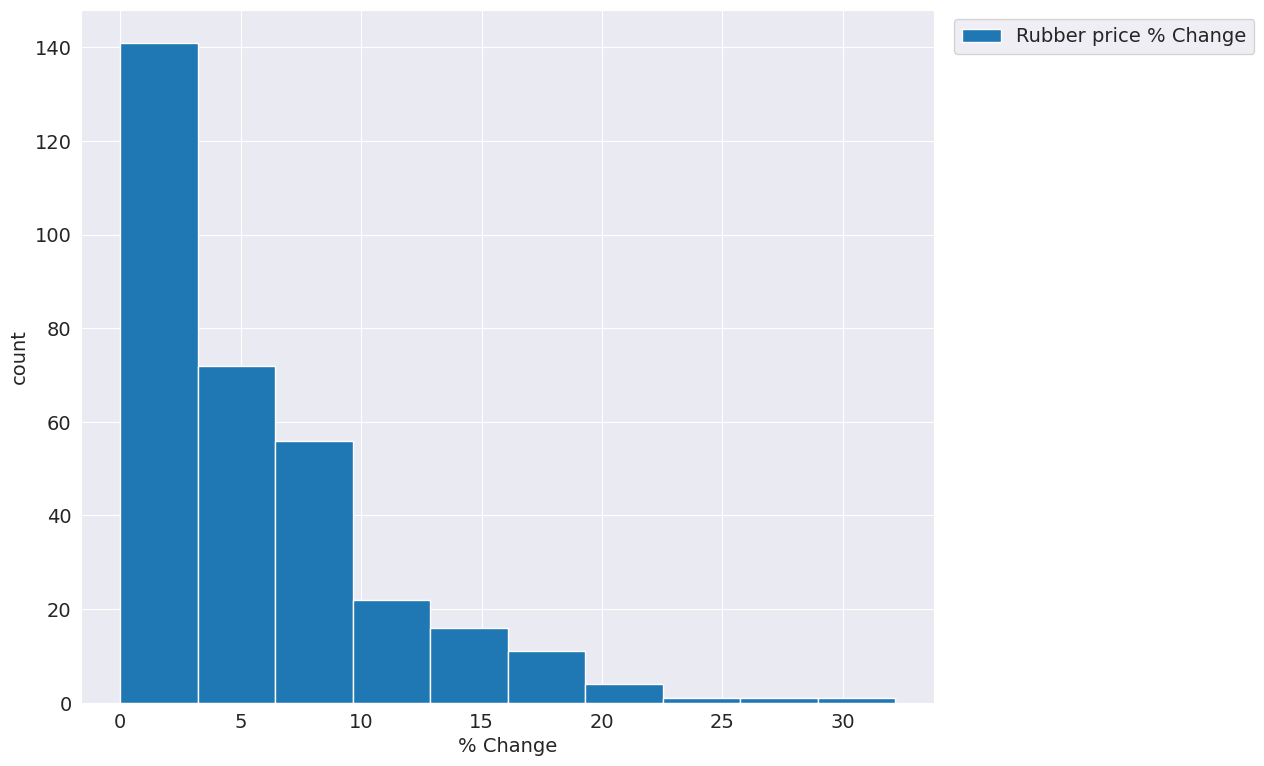

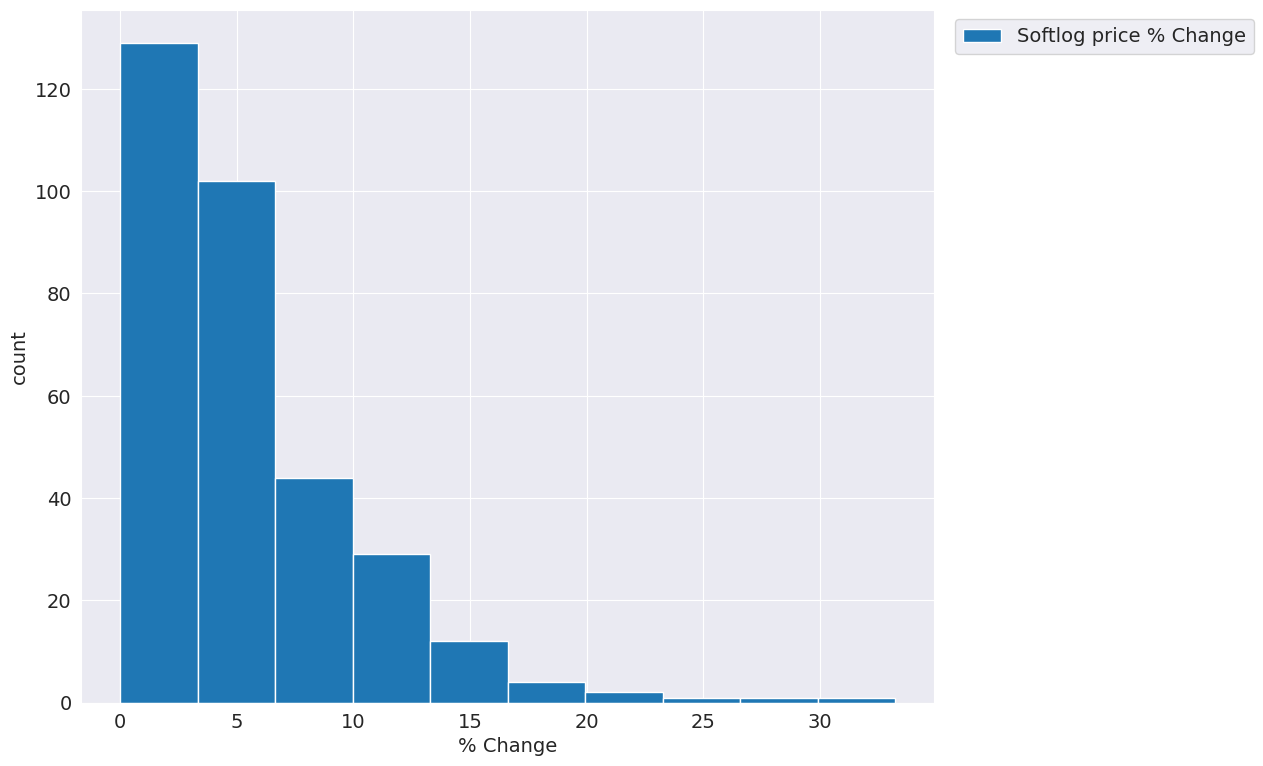

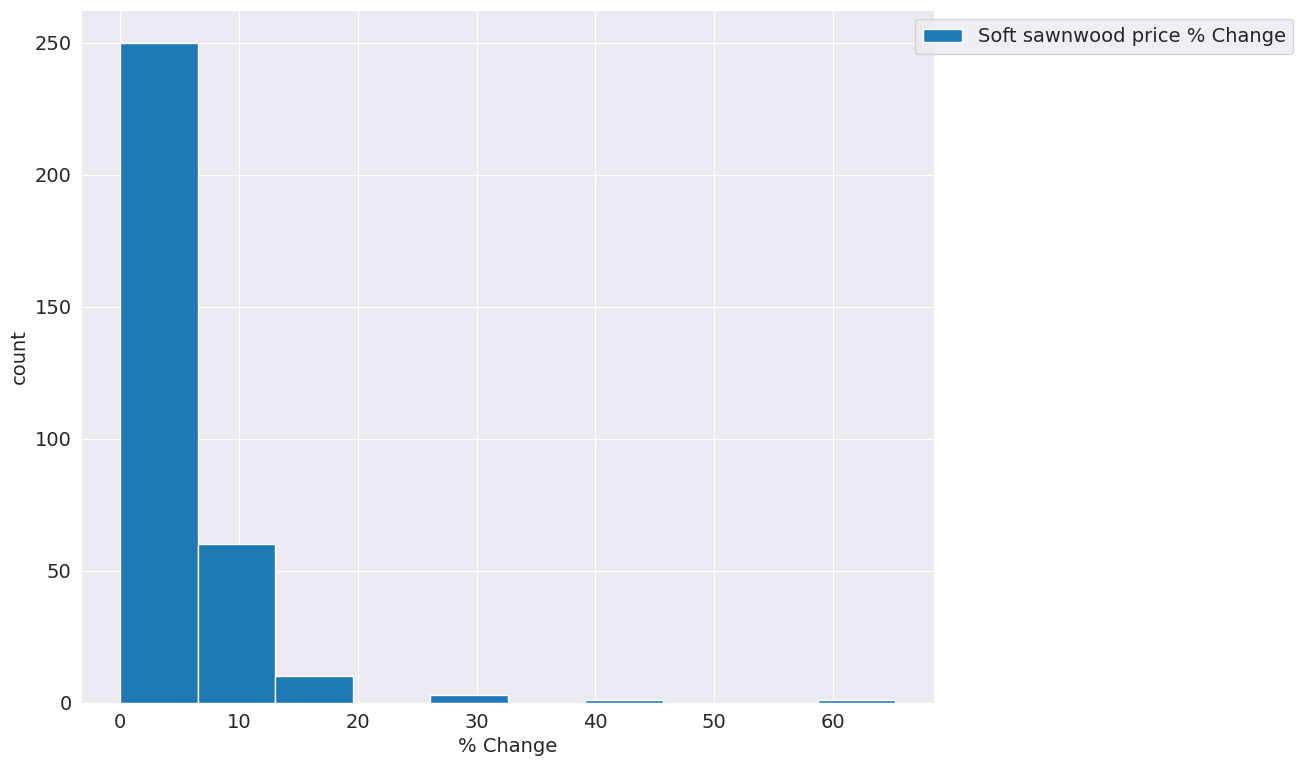

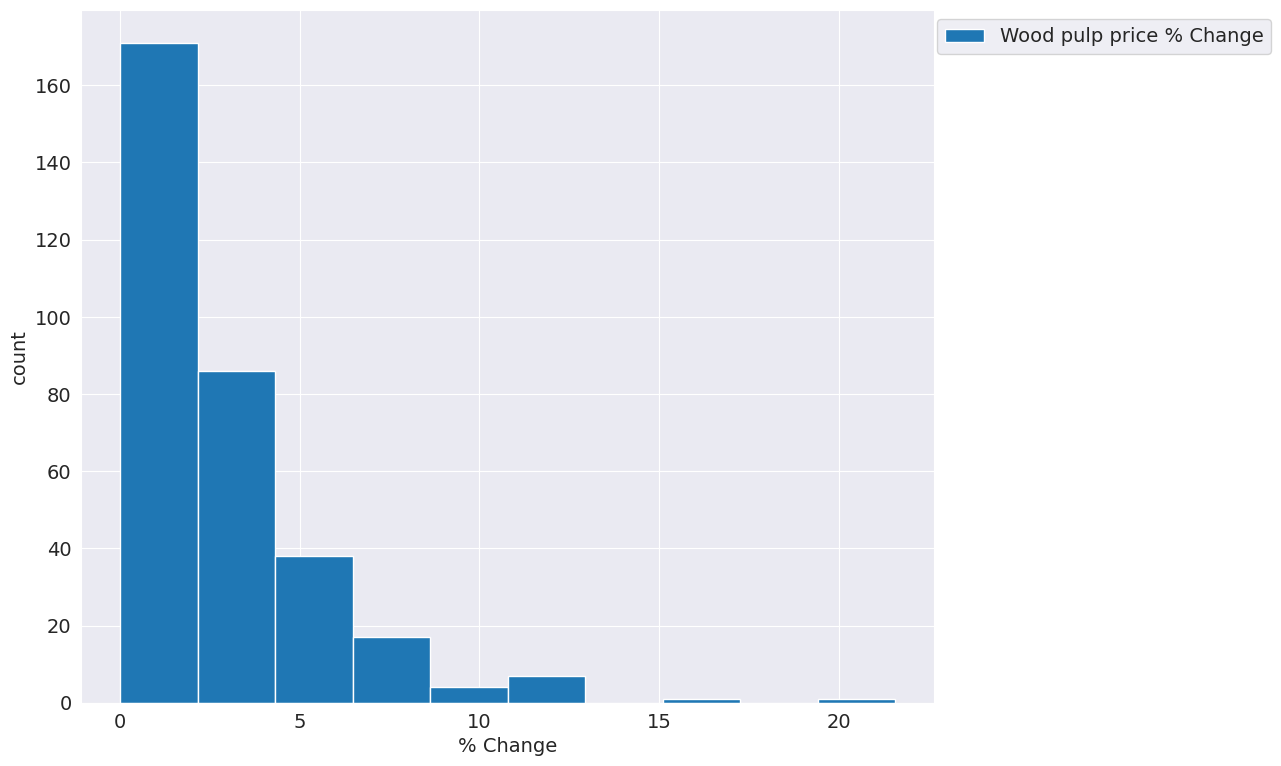

In [ ]:
changelist=['Copra price % Change',  'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',  'Rubber price % Change', 'Softlog price % Change',  'Soft sawnwood price % Change', 'Wood pulp price % Change']
for i in range(len(changelist)):
        plt.figure(figsize=(12,12))
        df[changelist[i]].hist(figsize=(11,9), linewidth=1)
        plt.xlabel('% Change')
        plt.ylabel('count')
        plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2,1))

Analisando os gráficos gerados acima, podemos ver a variação de preço de acordo com cada matéria-prima, e podemos ver que o percentual de variação frequente ideal geral é igual ou inferior à 5%.

Visto isto, é possível verrificar quais matérias-primas tem menor variação de custo, e automaticamente, seriam possíveis opções de compra devido a sua baixa alteração de valores no mercado.

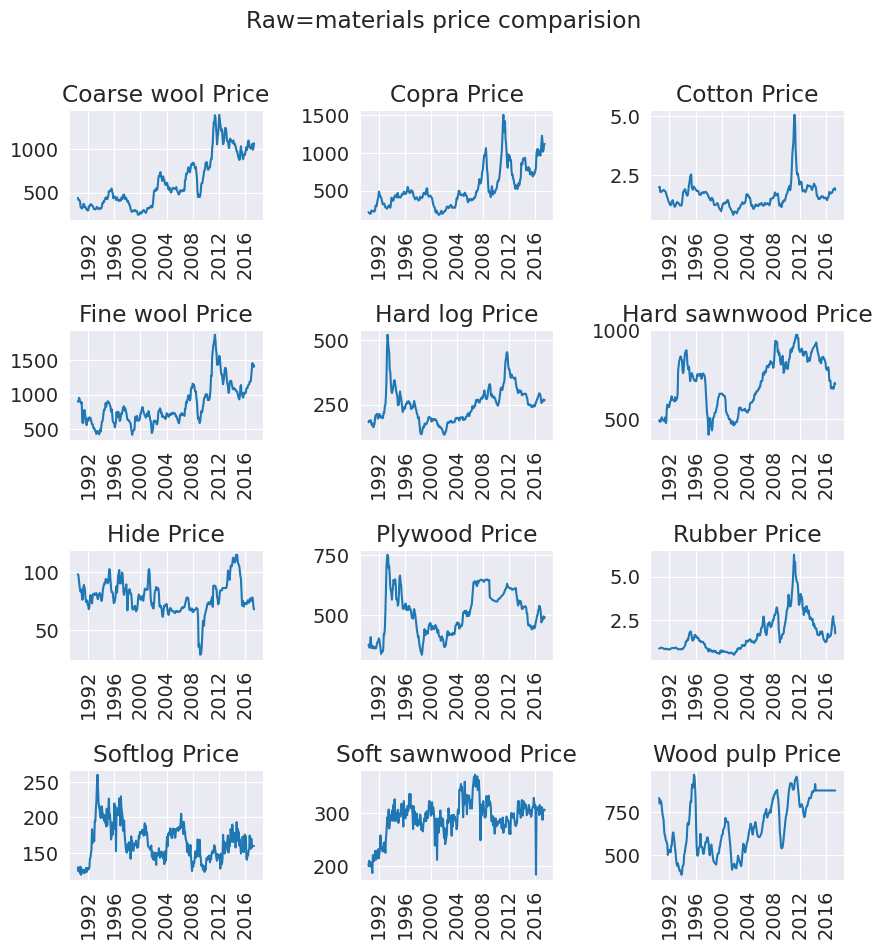

In [ ]:
plt.figure(figsize=(10,10))
materialslist=['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price','Hard log Price', 'Hard sawnwood Price',
            'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price',  'Wood pulp Price']
for i in range(len(materialslist)):
      plt.subplot(4,3,i+1)
      plt.subplots_adjust( hspace=1, wspace=0.5)
      plt.title(materialslist[i])
      plt.plot(df[materialslist[i]])
      plt.xticks(rotation=90)
      plt.suptitle("Raw=materials price comparision")

Com os códigos acima, vemos que entre as matérias-primas dentro do data frame, o algodão e a borracha são as matérias de menor valor de mercado em comparação as demais.

E como seria possível verificar a melhor compra entre o algodão e a borracha?


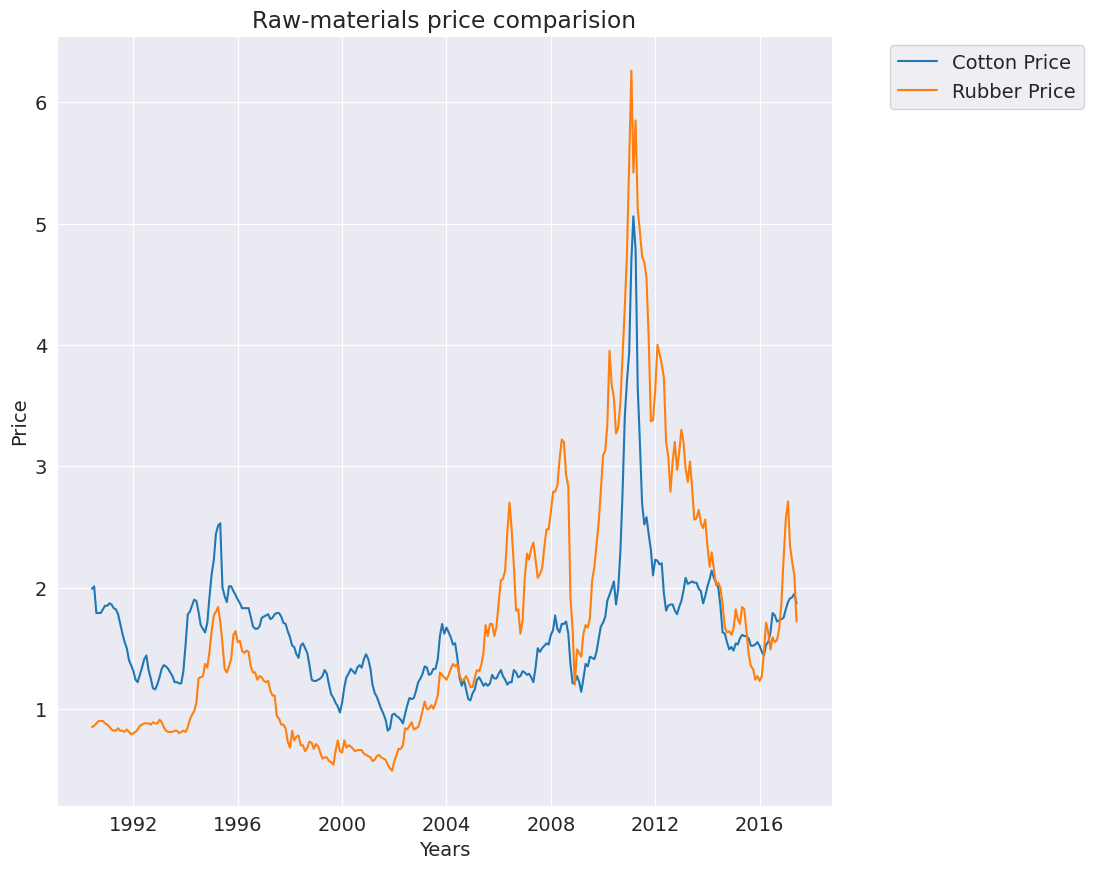

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title("Raw-materials price comparision")
plt.xlabel("Years")
plt.ylabel("Price")
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2,1))

Em um comparativo entre as duas matérias-primas, podemos ver que o algodão se destaca com o menor preço no mercado dentre os anos.

A partir dos gráficos gerados anteriormente, foi possível analisar quais foram as matérias-primas alto e baixo preço ao longo dos anos, sendo elas:
*   Baixo valor de mercado: algodão, couro, hardlog, softlog, madeira cerrada macia e borracha.
*   Alto valor: lã grossa, lã fina, copra, madeira cerrada macia, madeira compensada e pasta de materia.  



In [ ]:
import random as random

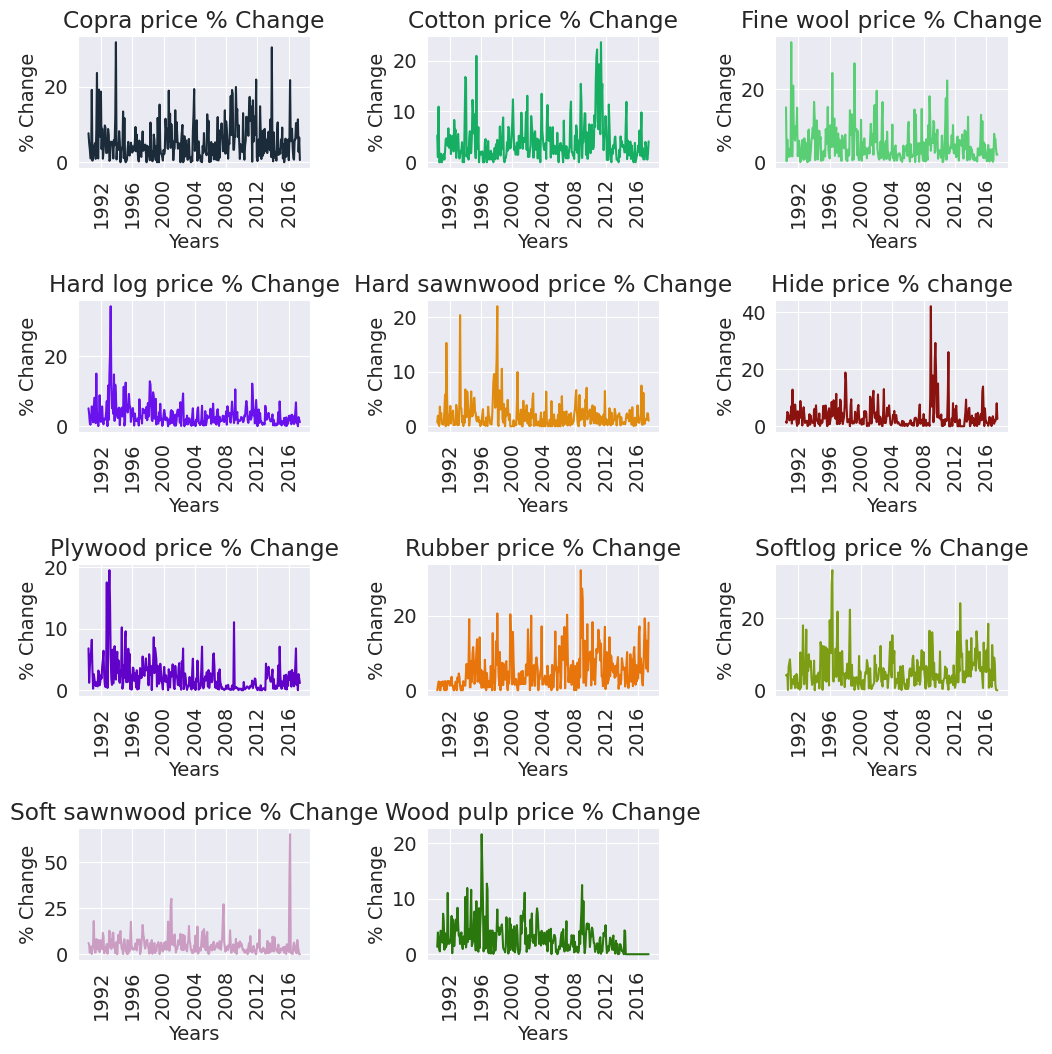

In [ ]:
plt.figure(figsize=(12,12))
for i in range(len(changelist)):

    r= random.random()
    g= random.random()
    b= random.random()
    color= (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1, wspace=0.5)
    plt.plot(df[changelist[i]], c=color)
    plt.xticks(rotation=90)
    plt.title (changelist[i])
    plt.xlabel("Years")
    plt.ylabel("% Change")

Verificando individualmente cada matéria-prima, vemos que a maior variação percentual foi da madeira serrada macia, variando cerca de 60%, e a menor variação percentual foi da madeira compensada, em menos de 20%.

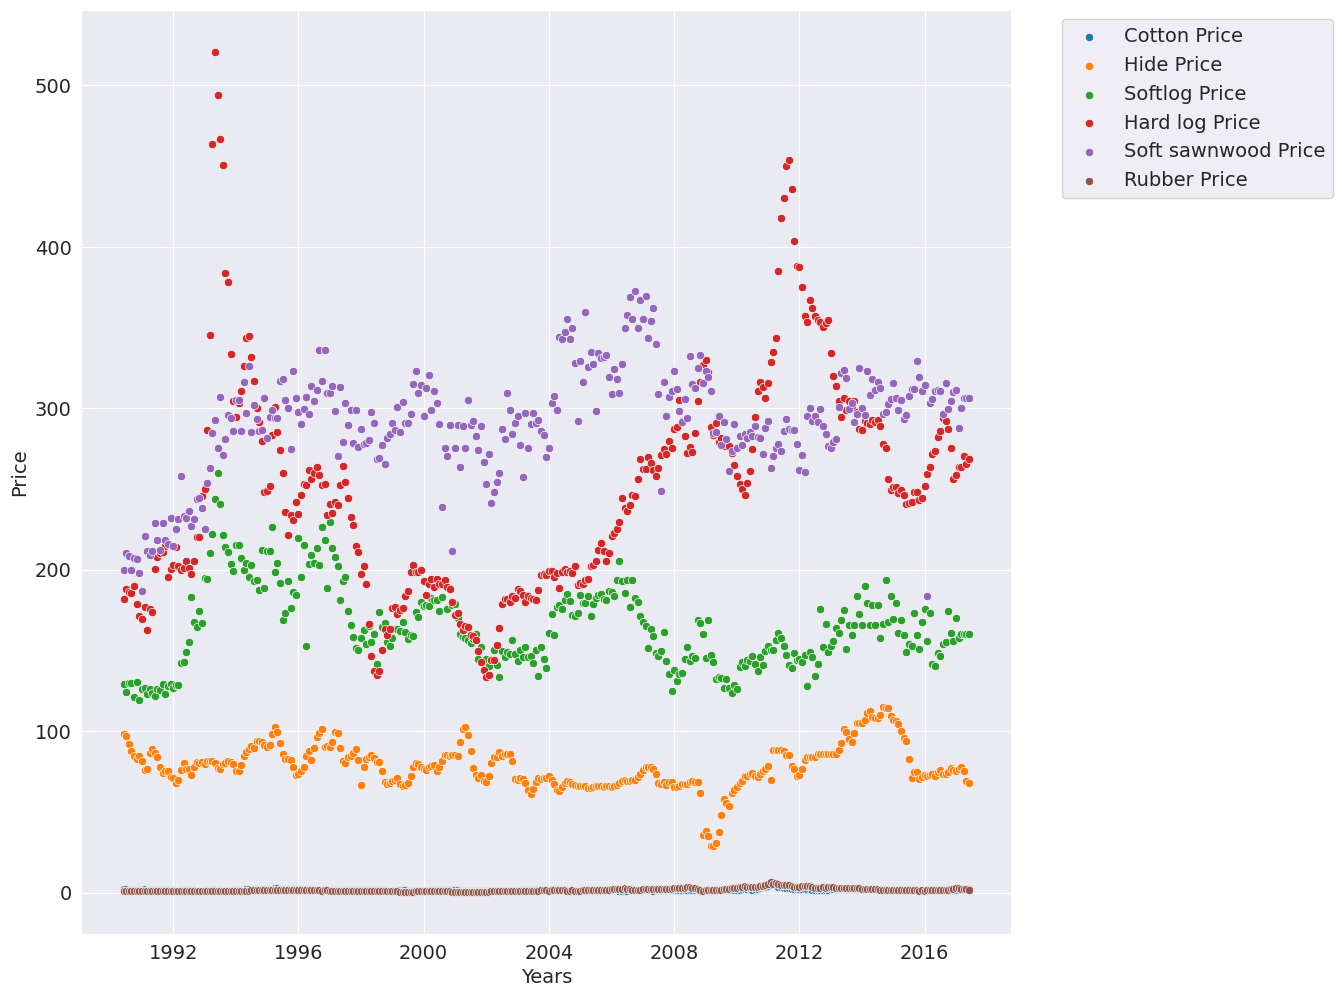

In [ ]:
lowlist=['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
plt.figure(figsize=(12,12))
plt.xlabel("Years")
plt.ylabel("Price")
for i in range(len(lowlist)):
   sns.scatterplot(y=df[lowlist[i]], x=df.index);
   plt.legend(lowlist, loc='upper center', bbox_to_anchor=(1.2,1))

Neste gráfico de dispersão, é possível vizualizar dentre as matérias-primas de menor valor, quais tiveram mudanças drásticas em seu custo ao longo dos anos.

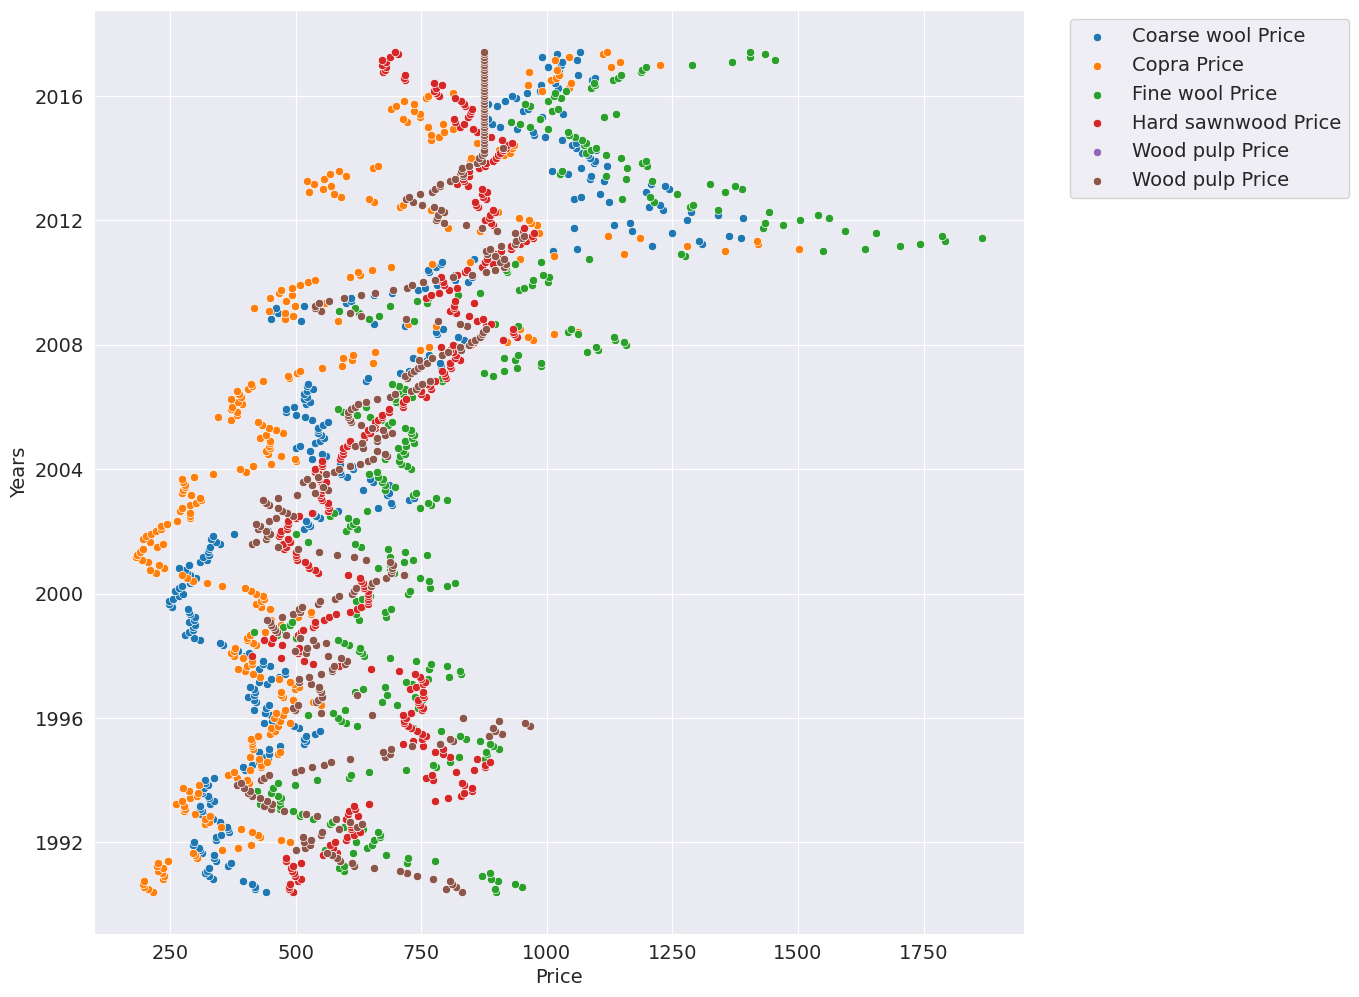

In [ ]:
highlist=['Coarse wool Price', 'Copra Price', 'Fine wool Price', 'Hard sawnwood Price', 'Wood pulp Price', 'Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel("Price")
plt.ylabel("Years")
for i in range(len(highlist)):
   sns.scatterplot(x=df[highlist[i]], y=df.index);
   plt.legend(highlist, loc='upper center', bbox_to_anchor=(1.2,1))

Comparando os gráficos de dispersão, podemos comparar as drásticas variações de preços ao longo dos anos, tanto das matérias-primas de baixo custo, quanto as de alto custo.

Analisando de forma geral, é possível afirmar que a madeira rígida foi a matéria-prima de maior variação entre as outras de baixo preço, enquanto a lã fina se destaca entre as matérias de alto valor de mercado com a maior variação ao longo dos anos.

# Inferências e Conclusão

Com a limpeza, extração e análise da base de dados deste estudo, foi possível analisar e entender diversas questões e correlações entre as matérias-primas, como por exemplo:



*   Descobrir quais são as matérias-primas de alto e baixo custo no mercado
*   Quais foram os percentuais de variação de cada matéria ao longo dos anos
*   Altas e baixas % de variações individuais para cada matéria-prima
*   A correlação entre elas com um mapa de calor

Estas análises possíbilitam criar medidas preventivas e preditivas para o uso e a comercialização dessas matérias-primas com base em seu histórico, onde é possível planejar e realizar estudos que visam a utilização de materiais alternativos, de menor custo e maior efetividade.